In [175]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import keras
from sklearn.preprocessing import LabelEncoder


In [176]:
pathDataset = './data'

In [177]:
flowersName = os.listdir(pathDataset)
flowersName
listX = []
listY = []

In [178]:
print("data loading ................")
for name in flowersName:
    flowers = os.listdir(pathDataset +'/' + str(name))
    print(name, len(listX),end=' -> ')
    for flower in flowers:
        img = cv2.imread(pathDataset +'/' + str(name) +'/' + str(flower))
        img = cv2.resize(img,(32,32))
        listX.append(img)
        listY.append(name)
    
    


data loading ................
Lilly 0 -> Lotus 1000 -> Orchid 2000 -> Sunflower 3000 -> Tulip 4000 -> 

In [179]:
print(len(listX))
print(len(listY))

5000
5000


In [180]:
print(listY[1000])

Lotus


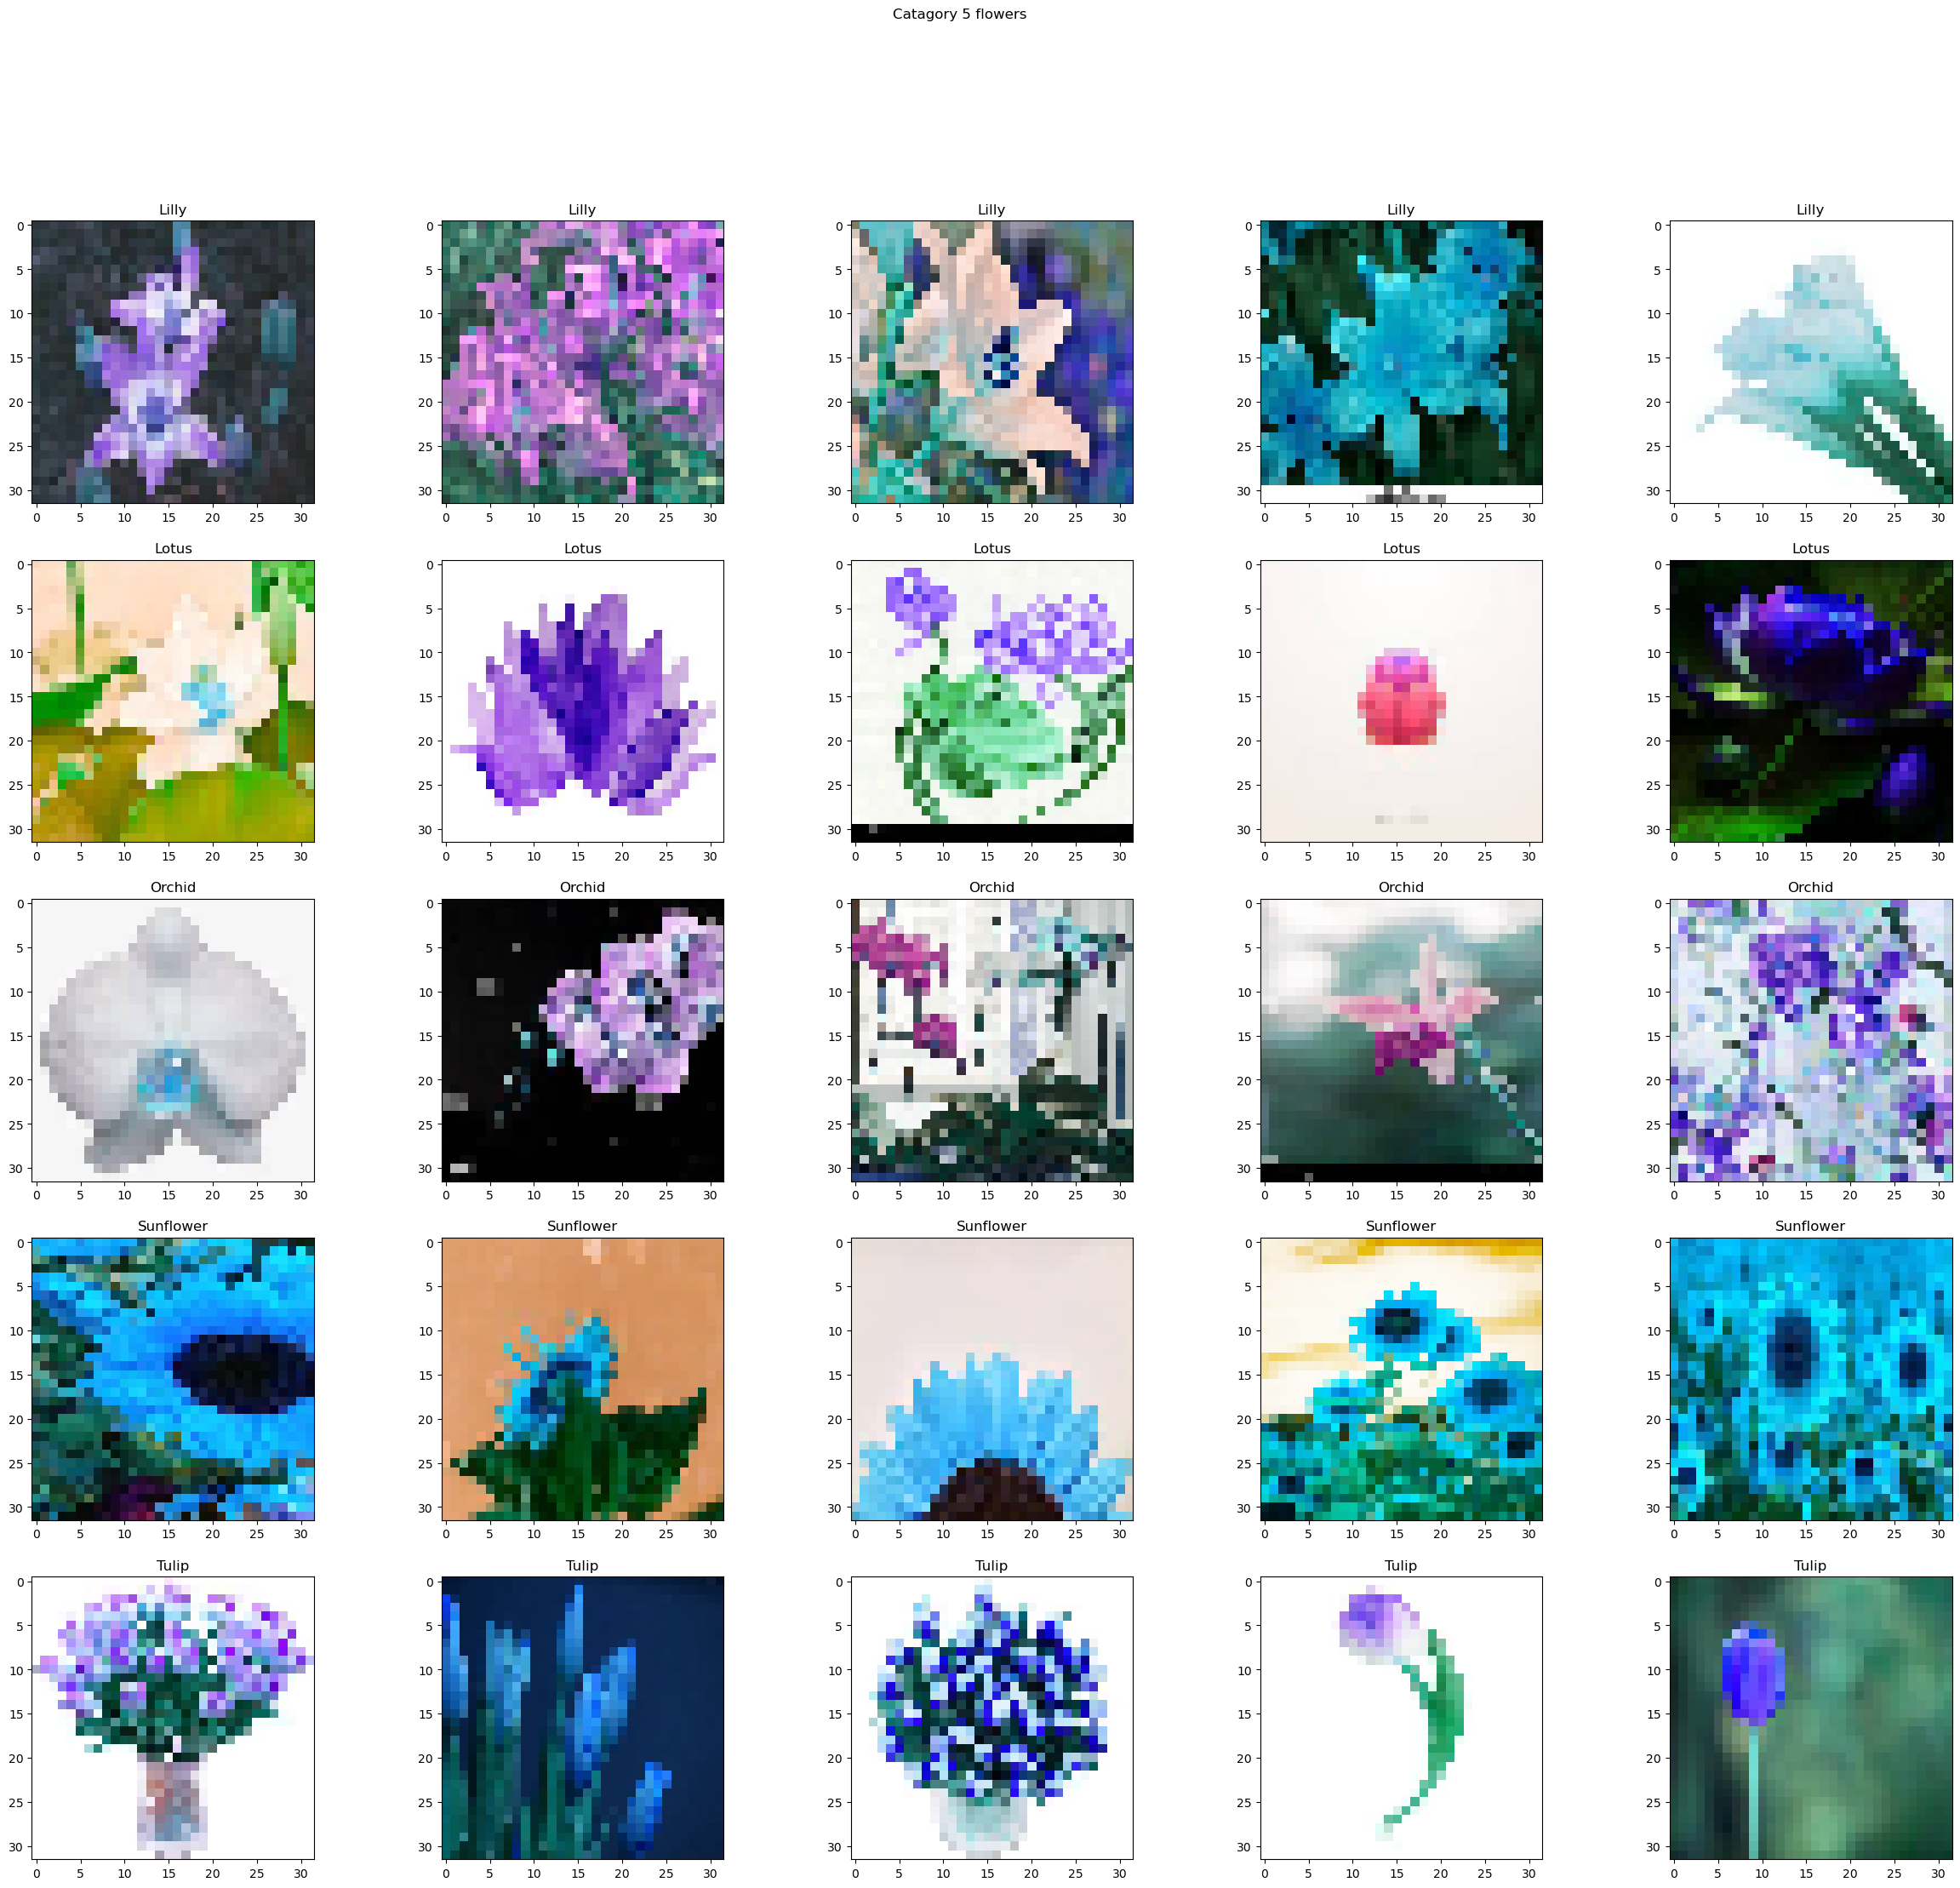

In [181]:
# visualize tap du lieu
fig, ax = plt.subplots(5,5, figsize = (30,25))
fig.suptitle("Catagory 5 flowers")
for i in range(5):
    for j in range(5):
        img = listX[1000*i+j]
        label = listY[1000*i+j]
        ax[i,j].imshow(img)
        ax[i,j].set_title(str(label))


In [182]:
listX_preprocess = [x.astype('float32')/255 for x in listX]

In [183]:
lb = LabelEncoder()
listY_preprocess = lb.fit_transform(listY)

In [184]:
# chia tap du lie train, test
X_train, X_test, y_train, y_test= train_test_split(listX_preprocess, listY_preprocess, test_size=1/3, random_state=42)
print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

3333 1667
3333 1667


In [185]:
# chia tap du lieu train val
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=1/4, random_state=42)

In [186]:
# # pre-processing cho du lieu anh
# vgg16 = tf.keras.applications.vgg16
# process_train = tf.keras.preprocessing.image.ImageDataGenerator(
#     preprocessing_function=vgg16.preprocess_input,
#     rotation_range=90,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest')
# process_test = tf.keras.preprocessing.image.ImageDataGenerator(
#     preprocessing_function=vgg16.preprocess_input,
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest')

In [187]:
model = tf.keras.models.Sequential()
layers = tf.keras.layers

In [204]:
print(X_train[0].shape)

(32, 32, 3)


In [188]:
input_shape = (32,32,3)

In [189]:
model.add(layers.Conv2D(32, (3,3), padding='same', input_shape = input_shape))
model.add(layers.Activation('ReLU'))
model.add(layers.BatchNormalization())


In [190]:
model.add(layers.Conv2D(32,(3,3),padding='same'))
model.add(layers.Activation('ReLU'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2,2)))

In [191]:
model.add(layers.Conv2D(64, (3,3), padding='same'
                        ))
model.add(layers.Activation('ReLU'))
model.add(layers.BatchNormalization())

In [192]:
model.add(layers.Conv2D(64,(3,3),padding='same'))
model.add(layers.Activation('ReLU'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2,2)))

In [193]:
model.add(layers.Conv2D(128, (3,3), padding='same'))
model.add(layers.Activation('ReLU'))
model.add(layers.BatchNormalization())

In [194]:
model.add(layers.Conv2D(128,(3,3),padding='same'))
model.add(layers.Activation('ReLU'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2,2)))

In [195]:
model.add(layers.Conv2D(256, (3,3), padding='same'))
model.add(layers.Activation('ReLU'))
model.add(layers.BatchNormalization())


In [196]:
model.add(layers.Conv2D(256, (3,3), padding='same'))
model.add(layers.Activation('ReLU'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2,2)))

In [197]:
model.add(layers.Flatten())
model.add(layers.Dense(512))
model.add(layers.Activation('ReLU'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64))
model.add(layers.Activation('ReLU'))
model.add(layers.BatchNormalization())


In [198]:
model.add(layers.Dense(len(flowersName)))
model.add(layers.Activation('softmax'))


In [199]:
# data point = 32 * 32 * 5000 = 5.120.000
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_58 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_53 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_53 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 activation_59 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_54 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                    

In [200]:
aug = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=0.18,zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)
learning_rate = 0.01
epochs = 10
batch_size = 24


In [201]:
otp = tf.keras.optimizers.experimental.SGD(learning_rate=learning_rate, momentum = 0.9)

In [202]:
model.compile(optimizer=otp, loss="categorical_crossentropy", metrics='accuracy')

In [ ]:
H = model.fit_generator(aug.flow(X_train, y_train, batch_size=batch_size), validation_data=(X_val, y_val), steps_per_epoch=len(X_train)/batch_size, epochs=epochs,verbose=1)